In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Newton Raphson 

Newton raphson is an algorithm to find the root values of a function. In other words, it finds a value that makes the function equal to 0. This demonstration will use the example function of:

$$ f(x) = x^{2}-3 $$

The assumption here is that somehow, you know the estimated positions of the root. Thus, this algorithm is used to optimised the root position that you have specified. 

Closed form solution:

$$ x_{n+1} = x_{n} - \frac{f(x)}{f'(x)}$$

Note: this work for all n derivatives. Ex: finding a root for first derivative of f(x):

$$ x_{n+1} = x_{n} - \frac{f'(x)}{f''(x)}$$

In [2]:
def myfunc(x):
    return (x**2)-3

### Manual Calculation

Let f(x) = 0
$$ 0 = x^{2}-3 $$
$$ x = \sqrt{3} $$

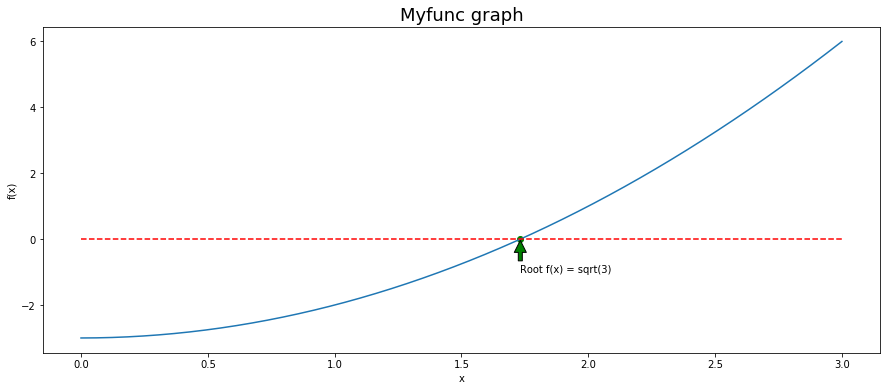

In [4]:
plt.figure(figsize=(15, 6))
x = np.linspace(0, 3)
y = myfunc(x)
plt.plot(x, y)
plt.plot(x, np.zeros((1,len(x))).flatten(), 'r--')
plt.title('Myfunc graph', fontsize=18)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.annotate('Root f(x) = sqrt(3)', xy=(3**0.5, 0), xytext = (3**0.5, -1), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.scatter(x=np.sqrt(3), y=0, c='g')
plt.show()

Here, we could see that it might be easy to find it directly. This is because our function here is not complex; thus, it is easy to find the root.

### Newton Raphson Method

In [11]:
def myfunc_first_der(x):
    return 2*x

In [27]:
def newt_raph_algo(xn, eps):
    
    xn_lst = [xn]
    fx_lst = []
    
    # get the function value
    fx = myfunc(xn)
    fx_1 = myfunc_first_der(xn)
    
    iterate = 0

    while fx > eps:

        # update the root position
        xn_1 = xn-(fx/fx_1)
        xn_lst.append(xn_1)
        xn = xn_1

        # update the function value
        fx = myfunc(xn)
        fx_1 = myfunc_first_der(xn)
        fx_lst.append(fx)

        iterate += 1
    
    print('-'*5+' Algorithm Converge '+'-'*5)
    print(f'Root = {xn}')
    print(f'Iteration: {iterate}')
    
    return (xn_lst, fx_lst, xn, iterate)
    
    

In [29]:
xn_lst, fx_lst, xn, iterate = newt_raph_algo(2.5, 10**-8)    

----- Algorithm Converge -----
Root = 1.7320508075736647
Iteration: 4


### Detailed Iteration

### First Iteration

In [35]:
def tangent(x, x0):
    return myfunc_first_der(x0)*(x-x0)+myfunc(x0)

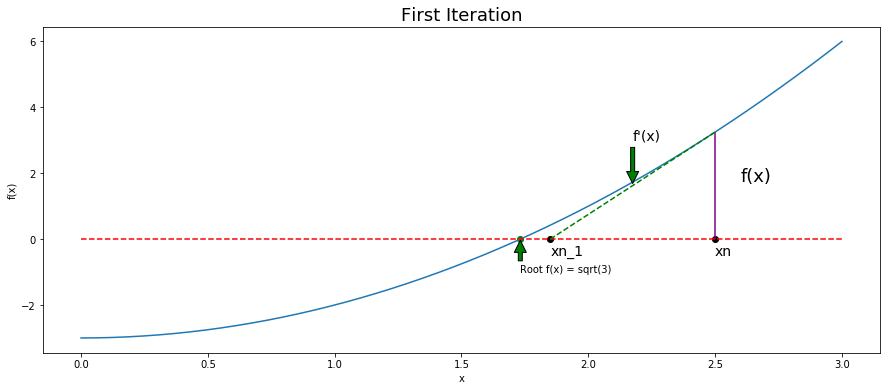

In [78]:
plt.figure(figsize=(15, 6))
x = np.linspace(0, 3)
y = myfunc(x)
plt.plot(x, y)
plt.plot(x, np.zeros((1,len(x))).flatten(), 'r--')

x0 = 2.5

plt.scatter(x0, 0, c='black')
plt.annotate('xn', xy=(x0, 0), xytext = (x0, -0.5), fontsize=14)

plt.vlines(x=x0, ymin=0, ymax=myfunc(x0), color='purple', zorder=2)
plt.annotate('f(x)', xy=(x0, x0**2-4.5), xytext = (x0+0.1, x0**2-4.5), fontsize=18)

plt.scatter(xn_lst[1], 0, c='black')
plt.annotate('xn_1', xy=(xn_lst[1], 0), xytext = (xn_lst[1], -0.5), fontsize=14)

x_tan = np.linspace(xn_lst[1], xn_lst[0])
plt.plot(x_tan, tangent(x_tan, x0), 'g--')
plt.annotate("f'(x)", xy=((xn_lst[1]+xn_lst[0])/2, tangent((xn_lst[1]+xn_lst[0])/2, xn_lst[0])), 
             xytext = ((xn_lst[1]+xn_lst[0])/2, 3), fontsize=14,
            arrowprops=dict(facecolor='green', shrink=0.05))

plt.title('First Iteration', fontsize=18)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.annotate('Root f(x) = sqrt(3)', xy=(3**0.5, 0), xytext = (3**0.5, -1), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.scatter(x=np.sqrt(3), y=0, c='g')
plt.show()

Remember, our goal is to get xn_i, where xn_i is the root position of f(x). As seen by the graph, the tangent line (f'(x)) here is used to update the xn position (xn_1) in order to reach the root of f(x). This can be done by leveraging the definition of gradient line, which is $\frac{y}{x}$. y here is f(x), and x is xn_1-xn. However, since we don't know xn_1, an alternative to get the tangent equation is taking the derivative of f'(xn). In this way, one may get the following equality:

$$ f'(x_n) = \frac{f(x_n)}{x_{n+1}-x_{n}} $$
$$ x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$$

The algorithm should stop iterating when f(x) ~ 0

### Second Iteration

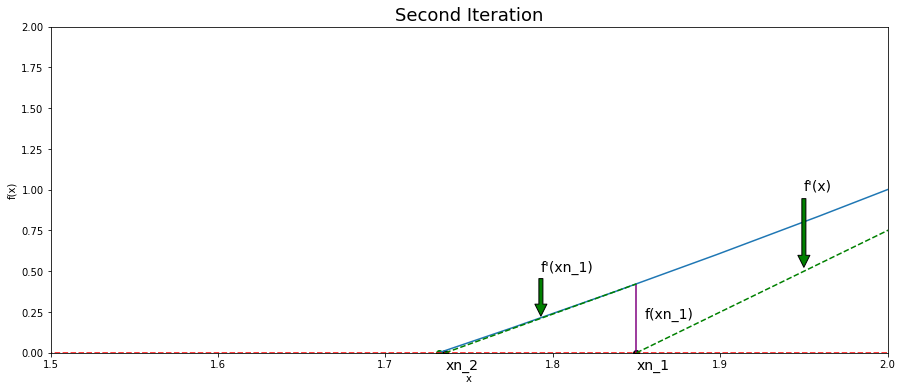

In [105]:
plt.figure(figsize=(15, 6))
x = np.linspace(0, 3)
y = myfunc(x)
plt.plot(x, y)
plt.plot(x, np.zeros((1,len(x))).flatten(), 'r--')

x0 = 2.5

plt.scatter(xn_lst[1], 0, c='black')
plt.annotate('xn_1', xy=(xn_lst[1], 0), xytext = (xn_lst[1], -0.1), fontsize=14)

plt.vlines(x=xn_lst[1], ymin=0, ymax=myfunc(xn_lst[1]), color='purple', zorder=2)
plt.annotate('f(xn_1)', xy=(xn_lst[1], myfunc(xn_lst[1])/2), xytext = (xn_lst[1]+0.005, myfunc(xn_lst[1])/2), 
             fontsize=14)

plt.scatter(xn_lst[2], 0, c='black')
plt.annotate('xn_2', xy=(xn_lst[2], 0), xytext = (xn_lst[2], -0.1), fontsize=14)

x_tan = np.linspace(xn_lst[1], xn_lst[0])
plt.plot(x_tan, tangent(x_tan, x0), 'g--')
plt.annotate("f'(x)", xy=(1.95, tangent(1.95, x0)), 
             xytext = (1.95, 1), fontsize=14,
            arrowprops=dict(facecolor='green', shrink=0.05))
        
x_tan = np.linspace(xn_lst[2], xn_lst[1])
plt.plot(x_tan, tangent(x_tan, xn_lst[1]), 'g--')
plt.annotate("f'(xn_1)", xy=((xn_lst[2]+xn_lst[1])/2, tangent((xn_lst[2]+xn_lst[1])/2, xn_lst[1])), 
             xytext = ((xn_lst[2]+xn_lst[1])/2, 0.5), fontsize=14,
            arrowprops=dict(facecolor='green', shrink=0.05))

plt.title('Second Iteration', fontsize=18)
plt.ylabel('f(x)')
plt.xlabel('x')
#plt.annotate('Root f(x) = sqrt(3)', xy=(3**0.5, 0), xytext = (3**0.5, -1), 
             #arrowprops=dict(facecolor='green', shrink=0.05))
plt.scatter(x=np.sqrt(3), y=0, c='g')
plt.xlim(1.5, 2)
plt.ylim(0, 2)
plt.show()

As you can see, with just 2 iteration, we almost reach the root of f(x). Iterating further will only move the x position slightly, as the algorithm has nearly reach the root position.